In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
#importing data from csv file usinf pandas
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [91]:
#storing number of row of data
trainrow=train.shape[0]
print(trainrow)
testrow=test.shape[0]

1460


In [4]:
#copying id data
testids=test['Id'].copy()

In [5]:
#copying sales priece
y_train=train['SalePrice'].copy()

In [6]:
#combining train and test data
data=pd.concat((train,test)).reset_index(drop=True)
data=data.drop('SalePrice',1)

In [7]:
#dropping id columns
data=data.drop('Id',axis=1)

# Missing Data

In [8]:
#checking missing data
missing=data.isnull().sum().sort_values(ascending=False)
missing=missing.drop(missing[missing==0].index)
missing

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageQual       159
GarageYrBlt      159
GarageFinish     159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
BsmtUnfSF          1
TotalBsmtSF        1
Exterior1st        1
SaleType           1
Electrical         1
KitchenQual        1
GarageArea         1
GarageCars         1
dtype: int64

In [9]:
#PoolQC is quality of pool but mostly house does not have pool so putting NA
data['PoolQC']=data['PoolQC'].fillna('NA')
data['PoolQC'].unique()

array(['NA', 'Ex', 'Fa', 'Gd'], dtype=object)

In [10]:
#MiscFeature: mostly house does not have it so putting NA
data['MiscFeature']=data['MiscFeature'].fillna('NA')
data['MiscFeature'].unique()

array(['NA', 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [11]:
#Alley,Fence,FireplaceQu: mostly house does not have it so putting NA
data['Alley']=data['Alley'].fillna('NA')
data['Alley'].unique()

data['Fence']=data['Fence'].fillna('NA')
data['Fence'].unique()

data['FireplaceQu']=data['FireplaceQu'].fillna('NA')
data['FireplaceQu'].unique()

array(['NA', 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [12]:
#LotFrontage: all house have linear connected feet so putting most mean value
data['LotFrontage']=data['LotFrontage'].fillna(data['LotFrontage'].dropna().mean())

In [13]:
#GarageCond,GarageQual,GarageFinish
data['GarageCond']=data['GarageCond'].fillna('NA')
data['GarageCond'].unique()

data['GarageQual']=data['GarageQual'].fillna('NA')
data['GarageQual'].unique()

data['GarageFinish']=data['GarageFinish'].fillna('NA')
data['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', 'NA'], dtype=object)

In [14]:
#GarageYrBlt,GarageType,GarageArea,GarageCars putting 0
data['GarageYrBlt']=data['GarageYrBlt'].fillna(0)
data['GarageType']=data['GarageType'].fillna(0)
data['GarageArea']=data['GarageArea'].fillna(0)
data['GarageCars']=data['GarageCars'].fillna(0)

In [15]:
#BsmtExposure,BsmtCond,BsmtQual,BsmtFinType2,BsmtFinType1 
data['BsmtExposure']=data['BsmtExposure'].fillna('NA')
data['BsmtCond']=data['BsmtCond'].fillna('NA')
data['BsmtQual']=data['BsmtQual'].fillna('NA')
data['BsmtFinType2']=data['BsmtFinType2'].fillna('NA')
data['BsmtFinType1']=data['BsmtFinType1'].fillna('NA')

#BsmtFinSF1,BsmtFinSF2 
data['BsmtFinSF1']=data['BsmtFinSF1'].fillna(0)
data['BsmtFinSF2']=data['BsmtFinSF2'].fillna(0)

In [16]:
#MasVnrType,MasVnrArea
data['MasVnrType']=data['MasVnrType'].fillna('NA')
data['MasVnrArea']=data['MasVnrArea'].fillna(0)

In [17]:
#MSZoning 
data['MSZoning']=data['MSZoning'].fillna(data['MSZoning'].dropna().sort_values().index[0])

In [18]:
#Utilities
data['Utilities']=data['Utilities'].fillna(data['Utilities'].dropna().sort_values().index[0])

In [19]:
#BsmtFullBath
data['BsmtFullBath']=data['BsmtFullBath'].fillna(0)

#Functional
data['Functional']=data['Functional'].fillna(data['Functional'].dropna().sort_values().index[0])

#BsmtHalfBath
data['BsmtHalfBath']=data['BsmtHalfBath'].fillna(0)

#BsmtUnfSF
data['BsmtUnfSF']=data['BsmtUnfSF'].fillna(0)

In [20]:
#Exterior2nd
data['Exterior2nd']=data['Exterior2nd'].fillna('NA')

#Exterior1st
data['Exterior1st']=data['Exterior1st'].fillna('NA')

In [21]:
#TotalBsmtSF
data['TotalBsmtSF']=data['TotalBsmtSF'].fillna(0)

In [22]:
#SaleType
data['SaleType']=data['SaleType'].fillna(data['SaleType'].dropna().sort_values().index[0])

In [23]:
#Electrical
data['Electrical']=data['Electrical'].fillna(data['Electrical'].dropna().sort_values().index[0])

In [24]:
#KitchenQual
data['KitchenQual']=data['KitchenQual'].fillna(data['KitchenQual'].dropna().sort_values().index[0])

In [25]:
#lets check any missing remain
missing=data.isnull().sum().sort_values(ascending=False)
missing=missing.drop(missing[missing==0].index)
missing

Series([], dtype: int64)

In [26]:
#great no missing data

# Feature Engineering

In [27]:
#lets check correlation between SalePrice and other features
train=train.drop('Id',1)
corr=train.corr().sort_values(by='SalePrice',ascending=False).round(2)
print(corr['SalePrice'])

SalePrice        1.00
OverallQual      0.79
GrLivArea        0.71
GarageCars       0.64
GarageArea       0.62
TotalBsmtSF      0.61
1stFlrSF         0.61
FullBath         0.56
TotRmsAbvGrd     0.53
YearBuilt        0.52
YearRemodAdd     0.51
GarageYrBlt      0.49
MasVnrArea       0.48
Fireplaces       0.47
BsmtFinSF1       0.39
LotFrontage      0.35
WoodDeckSF       0.32
2ndFlrSF         0.32
OpenPorchSF      0.32
HalfBath         0.28
LotArea          0.26
BsmtFullBath     0.23
BsmtUnfSF        0.21
BedroomAbvGr     0.17
ScreenPorch      0.11
PoolArea         0.09
MoSold           0.05
3SsnPorch        0.04
BsmtFinSF2      -0.01
BsmtHalfBath    -0.02
MiscVal         -0.02
LowQualFinSF    -0.03
YrSold          -0.03
OverallCond     -0.08
MSSubClass      -0.08
EnclosedPorch   -0.13
KitchenAbvGr    -0.14
Name: SalePrice, dtype: float64


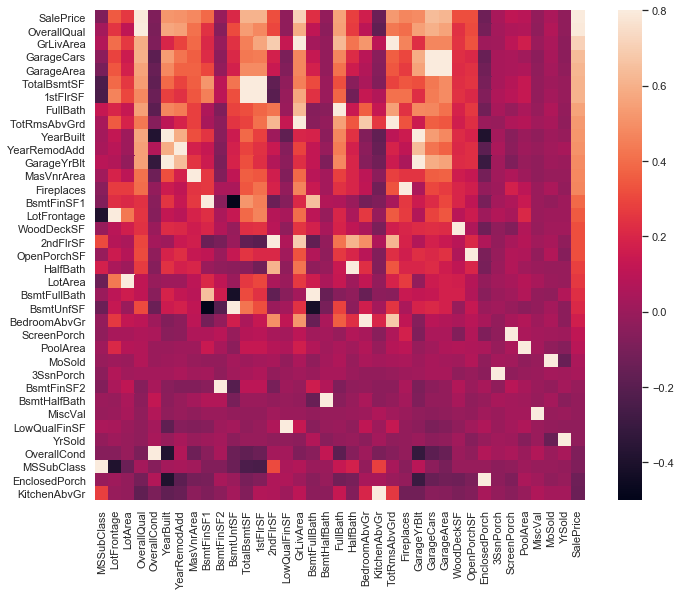

In [28]:
#heatmap
plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True);

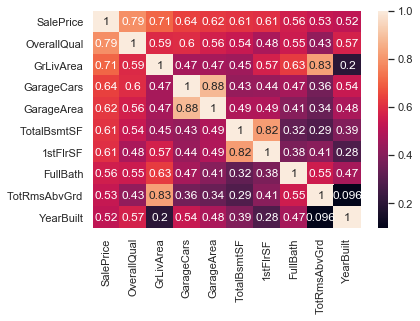

In [29]:
#now lets create heatmap for top 10 correlated features
cols =corr['SalePrice'].head(10).index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, annot=True, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [30]:
#lets add 1stFlrSF and 2ndFlrSF and create new feature floorfeet
data['Floorfeet']=data['1stFlrSF']+data['2ndFlrSF']
data=data.drop(['1stFlrSF','2ndFlrSF'],1)

In [31]:
def create_band(feature,size):
    data[feature+"_band"]=pd.cut(data[feature],size)
    return data[feature+"_band"].unique()

def define_intervals(value,feature,minval=0,maxval=0):
    data.loc[(data[feature]>minval) & (data[feature]<=maxval),feature]=value

In [32]:
create_band('Floorfeet',5)

[(1395.6, 2457.2], (328.692, 1395.6], (2457.2, 3518.8], (4580.4, 5642.0], (3518.8, 4580.4]]
Categories (5, interval[float64]): [(328.692, 1395.6] < (1395.6, 2457.2] < (2457.2, 3518.8] < (3518.8, 4580.4] < (4580.4, 5642.0]]

In [33]:
define_intervals(value=1,feature='Floorfeet',minval=328.692,maxval=1395.6)
define_intervals(value=2,feature='Floorfeet',minval=1395.6,maxval=2457.2)
define_intervals(value=3,feature='Floorfeet',minval=2457.2,maxval=3518.8)
define_intervals(value=4,feature='Floorfeet',minval=3518.8,maxval=4580.4)
define_intervals(value=5,feature='Floorfeet',minval=4580.4,maxval=5642.0)
data=data.drop('Floorfeet_band',1)
data=pd.get_dummies(data=data,columns=['Floorfeet'],prefix='Floorfeet')
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Floorfeet_1,Floorfeet_2,Floorfeet_3,Floorfeet_4,Floorfeet_5
0,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,2,2008,WD,Normal,0,1,0,0,0
1,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,...,0,5,2007,WD,Normal,1,0,0,0,0
2,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,9,2008,WD,Normal,0,1,0,0,0
3,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,2,2006,WD,Abnorml,0,1,0,0,0
4,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,...,0,12,2008,WD,Normal,0,1,0,0,0


In [34]:
data=pd.get_dummies(data=data,columns=['MSSubClass'],prefix='MSSubClass')
data=pd.get_dummies(data=data,columns=['MSZoning'],prefix='MSZoning')
data.head()

,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_1279,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,0,0,0,1,0
1,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,0,0,0,1,0
2,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,0,0,0,1,0
3,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,0,0,0,0,0,0,0,0,1,0
4,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,0,0,0,1,0


In [35]:
create_band('LotFrontage',3)

[(20.708, 118.333], (118.333, 215.667], (215.667, 313.0]]
Categories (3, interval[float64]): [(20.708, 118.333] < (118.333, 215.667] < (215.667, 313.0]]

In [36]:
define_intervals(value=1,feature='LotFrontage',maxval=118.333,minval=20.708)
define_intervals(value=2,feature='LotFrontage',maxval=215.667,minval=118.333)
define_intervals(value=3,feature='LotFrontage',maxval=313.0,minval=215.667)
data=data.drop('LotFrontage_band',1)
data=pd.get_dummies(data=data,columns=['LotFrontage'],prefix='LotFrontage')
data.head()

,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,MSSubClass_190,MSZoning_1279,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotFrontage_1.0,LotFrontage_2.0,LotFrontage_3.0
0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,0,1,0,1,0,0
1,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,0,0,0,0,0,1,0,1,0,0
2,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,0,1,0,1,0,0
3,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,0,0,0,0,0,1,0,1,0,0
4,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,0,0,0,0,0,1,0,1,0,0


In [37]:
create_band('LotArea',5)

[(1086.055, 44089.0], (44089.0, 86878.0], (129667.0, 172456.0], (172456.0, 215245.0], (86878.0, 129667.0]]
Categories (5, interval[float64]): [(1086.055, 44089.0] < (44089.0, 86878.0] < (86878.0, 129667.0] < (129667.0, 172456.0] < (172456.0, 215245.0]]

In [38]:
define_intervals(value=1,feature='LotArea',minval=1086.055,maxval=44089.)
define_intervals(value=2,feature='LotArea',minval=44089.0,maxval=86878.0)
define_intervals(value=3,feature='LotArea',minval=86878.0,maxval=129667.0)
define_intervals(value=4,feature='LotArea',minval=129667.0,maxval=172456.0)
define_intervals(value=5,feature='LotArea',minval=172456.0,maxval=215245.0)
data=data.drop('LotArea_band',1)
data=pd.get_dummies(data=data,columns=['LotArea'],prefix='LotArea')
data.head()

,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,MSZoning_RL,MSZoning_RM,LotFrontage_1.0,LotFrontage_2.0,LotFrontage_3.0,LotArea_1,LotArea_2,LotArea_3,LotArea_4,LotArea_5
0,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,1,0,1,0,0,1,0,0,0,0
1,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,1,0,1,0,0,1,0,0,0,0
2,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,1,0,1,0,0,1,0,0,0,0
3,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,1,0,1,0,0,1,0,0,0,0
4,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,1,0,1,0,0,1,0,0,0,0


In [39]:
data=pd.get_dummies(data=data,columns=['Street','Alley','LotShape','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle'])
data.head()

,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,...,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,...,0,0,0,0,0,0,0,1,0,0
1,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,...,0,0,0,0,1,0,0,0,0,0
2,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,...,0,0,0,0,0,0,0,1,0,0
3,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,...,0,0,0,0,0,0,0,1,0,0
4,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,...,0,0,0,0,0,0,0,1,0,0


In [40]:
data['OverallQual']=data['OverallQual'].map({1:'Bad',2:'Bad',3:'Bad',4:'Bad',5:'Avg',6:'Avg',7:'Avg',8:'Good',9:'Good',10:'Good'})
data=pd.get_dummies(data=data,columns=['OverallQual'],prefix='OverallQual')

In [41]:
data['OverallCond']=data['OverallCond'].map({1:'Bad',2:'Bad',3:'Bad',4:'Bad',5:'Avg',6:'Avg',7:'Avg',8:'Good',9:'Good',10:'Good'})
data=pd.get_dummies(data=data,columns=['OverallCond'],prefix='OverallCond')

In [42]:
data['Remodeled']=0
data.loc[data['YearBuilt']!=data['YearRemodAdd'],'Remodeled']=1
data=data.drop('YearRemodAdd',1)
data=pd.get_dummies(data=data,columns=['Remodeled'])

In [43]:
create_band('YearBuilt',5)

[(1982.4, 2010.0], (1954.8, 1982.4], (1899.6, 1927.2], (1927.2, 1954.8], (1871.862, 1899.6]]
Categories (5, interval[float64]): [(1871.862, 1899.6] < (1899.6, 1927.2] < (1927.2, 1954.8] < (1954.8, 1982.4] < (1982.4, 2010.0]]

In [44]:
define_intervals(value=1,feature='YearBuilt',minval=1871.862,maxval=1899.6)
define_intervals(value=2,feature='YearBuilt',minval=1899.6,maxval=1927.2)
define_intervals(value=3,feature='YearBuilt',minval=1927.2,maxval=1954.8)
define_intervals(value=4,feature='YearBuilt',minval=1954.8,maxval=1982.4)
define_intervals(value=5,feature='YearBuilt',minval=1982.4,maxval=2010.0)
data=data.drop('YearBuilt_band',1)
data=pd.get_dummies(data=data,columns=['YearBuilt'])

In [45]:
data=pd.get_dummies(data=data,columns=['RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition'])

In [46]:
create_band('MasVnrArea',4)

[(-1.6, 400.0], (400.0, 800.0], (800.0, 1200.0], (1200.0, 1600.0]]
Categories (4, interval[float64]): [(-1.6, 400.0] < (400.0, 800.0] < (800.0, 1200.0] < (1200.0, 1600.0]]

In [47]:
define_intervals(value=1,feature='MasVnrArea',minval=0,maxval=400.)
define_intervals(value=2,feature='MasVnrArea',minval=400.,maxval=800.)
define_intervals(value=3,feature='MasVnrArea',minval=800.,maxval=1200.)
define_intervals(value=4,feature='MasVnrArea',minval=1200.,maxval=1600.)
data=data.drop('MasVnrArea_band',1)
data=pd.get_dummies(data=data,columns=['MasVnrArea'])

In [48]:
data['BsmtFinSF']=data['BsmtFinSF1']+data['BsmtFinSF2']
data=data.drop(['BsmtFinSF1','BsmtFinSF2'],1)

In [49]:
create_band('BsmtFinSF',4)

[(-5.644, 1411.0], (1411.0, 2822.0], (4233.0, 5644.0], (2822.0, 4233.0]]
Categories (4, interval[float64]): [(-5.644, 1411.0] < (1411.0, 2822.0] < (2822.0, 4233.0] < (4233.0, 5644.0]]

In [50]:
define_intervals(value=1,feature='BsmtFinSF',minval=0,maxval=1411.)
define_intervals(value=2,feature='BsmtFinSF',minval=1411.,maxval=2822.)
define_intervals(value=3,feature='BsmtFinSF',minval=2822.,maxval=4233.)
define_intervals(value=4,feature='BsmtFinSF',minval=4233.,maxval=5644.)
data=data.drop('BsmtFinSF_band',1)
data=pd.get_dummies(data=data,columns=['BsmtFinSF'])

In [51]:
create_band('BsmtUnfSF',4)

[(-2.336, 584.0], (584.0, 1168.0], (1168.0, 1752.0], (1752.0, 2336.0]]
Categories (4, interval[float64]): [(-2.336, 584.0] < (584.0, 1168.0] < (1168.0, 1752.0] < (1752.0, 2336.0]]

In [52]:
define_intervals(value=1,feature='BsmtUnfSF',minval=0,maxval=584.)
define_intervals(value=2,feature='BsmtUnfSF',minval=584.,maxval=1168.)
define_intervals(value=3,feature='BsmtUnfSF',minval=1168.,maxval=1752.)
define_intervals(value=4,feature='BsmtUnfSF',minval=1752.,maxval=2336.)
data=data.drop('BsmtUnfSF_band',1)
data=pd.get_dummies(data=data,columns=['BsmtUnfSF'])

In [53]:
create_band('TotalBsmtSF',4)

[(-6.11, 1527.5], (1527.5, 3055.0], (3055.0, 4582.5], (4582.5, 6110.0]]
Categories (4, interval[float64]): [(-6.11, 1527.5] < (1527.5, 3055.0] < (3055.0, 4582.5] < (4582.5, 6110.0]]

In [54]:
define_intervals(value=1,feature='TotalBsmtSF',minval=0,maxval=1527.5)
define_intervals(value=2,feature='TotalBsmtSF',minval=1527.5,maxval=3055.)
define_intervals(value=3,feature='TotalBsmtSF',minval=3055.,maxval=4582.5)
define_intervals(value=4,feature='TotalBsmtSF',minval=4582.5,maxval=6110.)
data=data.drop('TotalBsmtSF_band',1)
data=pd.get_dummies(data=data,columns=['TotalBsmtSF'])

In [55]:
create_band('LowQualFinSF',4)

[(-1.064, 266.0], (266.0, 532.0], (532.0, 798.0], (798.0, 1064.0]]
Categories (4, interval[float64]): [(-1.064, 266.0] < (266.0, 532.0] < (532.0, 798.0] < (798.0, 1064.0]]

In [56]:
define_intervals(value=1,feature='LowQualFinSF',minval=0,maxval=266.)
define_intervals(value=2,feature='LowQualFinSF',minval=266.,maxval=532.)
define_intervals(value=3,feature='LowQualFinSF',minval=532.,maxval=798.)
define_intervals(value=4,feature='LowQualFinSF',minval=798.,maxval=1064.)
data=data.drop('LowQualFinSF_band',1)
data=pd.get_dummies(data=data,columns=['LowQualFinSF'])

In [57]:
create_band('GrLivArea',5)

[(1395.6, 2457.2], (328.692, 1395.6], (2457.2, 3518.8], (3518.8, 4580.4], (4580.4, 5642.0]]
Categories (5, interval[float64]): [(328.692, 1395.6] < (1395.6, 2457.2] < (2457.2, 3518.8] < (3518.8, 4580.4] < (4580.4, 5642.0]]

In [58]:
define_intervals(value=1,feature='GrLivArea',minval=328.692,maxval=1395.6)
define_intervals(value=2,feature='GrLivArea',minval=1395.6,maxval=2457.2)
define_intervals(value=3,feature='GrLivArea',minval=2457.2,maxval=3518.8)
define_intervals(value=4,feature='GrLivArea',minval=3518.8,maxval=4580.4)
define_intervals(value=5,feature='GrLivArea',minval=4580.4,maxval=5642.)
data=data.drop('GrLivArea_band',1)
data=pd.get_dummies(data=data,columns=['GrLivArea'])

In [59]:
data['Bath']=data['BsmtFullBath']+data['BsmtHalfBath']*.5+data['FullBath']+data['HalfBath']*.5
data=data.drop(['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'],1)

In [60]:
data=pd.get_dummies(data=data,columns=['BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd'])

In [61]:
data.loc[data['GarageYrBlt']==2207.,'GarageYrBlt']=0

In [62]:
data["GarageYrBlt_band"]=pd.qcut(data['GarageYrBlt'],4)
data["GarageYrBlt_band"].unique()

[(2001.0, 2010.0], (1957.0, 1977.0], (1977.0, 2001.0], (-0.001, 1957.0]]
Categories (4, interval[float64]): [(-0.001, 1957.0] < (1957.0, 1977.0] < (1977.0, 2001.0] < (2001.0, 2010.0]]

In [63]:
define_intervals(value=1,feature='GarageYrBlt',minval=0,maxval=1957.)
define_intervals(value=2,feature='GarageYrBlt',minval=1957.,maxval=1977.0)
define_intervals(value=3,feature='GarageYrBlt',minval=1977.0,maxval=2001.0)
define_intervals(value=4,feature='GarageYrBlt',minval=2001.0,maxval=2010.)
data=data.drop('GarageYrBlt_band',1)
data=pd.get_dummies(data=data,columns=['GarageYrBlt'])

In [64]:
create_band('GarageArea',4)

[(372.0, 744.0], (744.0, 1116.0], (-1.488, 372.0], (1116.0, 1488.0]]
Categories (4, interval[float64]): [(-1.488, 372.0] < (372.0, 744.0] < (744.0, 1116.0] < (1116.0, 1488.0]]

In [65]:
define_intervals(value=1,feature='GarageArea',minval=0,maxval=372.)
define_intervals(value=2,feature='GarageArea',minval=372.,maxval=744.0)
define_intervals(value=3,feature='GarageArea',minval=744.0,maxval=1116.0)
define_intervals(value=4,feature='GarageArea',minval=1116.0,maxval=1488.)
data=data.drop('GarageArea_band',1)
data=pd.get_dummies(data=data,columns=['GarageArea'])

In [66]:
create_band('WoodDeckSF',4)

[(-1.424, 356.0], (356.0, 712.0], (712.0, 1068.0], (1068.0, 1424.0]]
Categories (4, interval[float64]): [(-1.424, 356.0] < (356.0, 712.0] < (712.0, 1068.0] < (1068.0, 1424.0]]

In [67]:
define_intervals(value=1,feature='WoodDeckSF',minval=0,maxval=356.)
define_intervals(value=2,feature='WoodDeckSF',minval=356.,maxval=712.0)
define_intervals(value=3,feature='WoodDeckSF',minval=712.0,maxval=1068.0)
define_intervals(value=4,feature='WoodDeckSF',minval=1068.0,maxval=1424.)
data=data.drop('WoodDeckSF_band',1)
data=pd.get_dummies(data=data,columns=['WoodDeckSF'])

In [68]:
create_band('OpenPorchSF',4)

[(-0.742, 185.5], (185.5, 371.0], (371.0, 556.5], (556.5, 742.0]]
Categories (4, interval[float64]): [(-0.742, 185.5] < (185.5, 371.0] < (371.0, 556.5] < (556.5, 742.0]]

In [69]:
define_intervals(value=1,feature='OpenPorchSF',minval=0,maxval=185.5)
define_intervals(value=2,feature='OpenPorchSF',minval=185.5,maxval=371.)
define_intervals(value=3,feature='OpenPorchSF',minval=371.,maxval=556.5)
define_intervals(value=4,feature='OpenPorchSF',minval=556.5,maxval=742.)
data=data.drop('OpenPorchSF_band',1)
data=pd.get_dummies(data=data,columns=['OpenPorchSF'])

In [70]:
create_band('EnclosedPorch',4)

[(-1.012, 253.0], (253.0, 506.0], (506.0, 759.0], (759.0, 1012.0]]
Categories (4, interval[float64]): [(-1.012, 253.0] < (253.0, 506.0] < (506.0, 759.0] < (759.0, 1012.0]]

In [71]:
define_intervals(value=1,feature='EnclosedPorch',minval=0,maxval=253.)
define_intervals(value=2,feature='EnclosedPorch',minval=253.,maxval=506.)
define_intervals(value=3,feature='EnclosedPorch',minval=506.,maxval=759.)
define_intervals(value=4,feature='EnclosedPorch',minval=759.,maxval=1012.)
data=data.drop('EnclosedPorch_band',1)
data=pd.get_dummies(data=data,columns=['EnclosedPorch'])

In [72]:
create_band('3SsnPorch',4)

[(-0.508, 127.0], (254.0, 381.0], (381.0, 508.0], (127.0, 254.0]]
Categories (4, interval[float64]): [(-0.508, 127.0] < (127.0, 254.0] < (254.0, 381.0] < (381.0, 508.0]]

In [73]:
define_intervals(value=1,feature='3SsnPorch',minval=0,maxval=127.)
define_intervals(value=2,feature='3SsnPorch',minval=127.,maxval=254.)
define_intervals(value=3,feature='3SsnPorch',minval=254.,maxval=381.)
define_intervals(value=4,feature='3SsnPorch',minval=381.,maxval=508.)
data=data.drop('3SsnPorch_band',1)
data=pd.get_dummies(data=data,columns=['3SsnPorch'])

In [74]:
create_band('ScreenPorch',4)

[(-0.576, 144.0], (144.0, 288.0], (288.0, 432.0], (432.0, 576.0]]
Categories (4, interval[float64]): [(-0.576, 144.0] < (144.0, 288.0] < (288.0, 432.0] < (432.0, 576.0]]

In [75]:
define_intervals(value=1,feature='ScreenPorch',minval=0,maxval=144.)
define_intervals(value=2,feature='ScreenPorch',minval=144.,maxval=288.)
define_intervals(value=3,feature='ScreenPorch',minval=288.,maxval=432.)
define_intervals(value=4,feature='ScreenPorch',minval=432.,maxval=576.)
data=data.drop('ScreenPorch_band',1)
data=pd.get_dummies(data=data,columns=['ScreenPorch'])

In [76]:
create_band('PoolArea',4)

[(-0.8, 200.0], (400.0, 600.0], (600.0, 800.0], (200.0, 400.0]]
Categories (4, interval[float64]): [(-0.8, 200.0] < (200.0, 400.0] < (400.0, 600.0] < (600.0, 800.0]]

In [77]:
define_intervals(value=1,feature='PoolArea',minval=0,maxval=200.)
define_intervals(value=2,feature='PoolArea',minval=200.,maxval=400.)
define_intervals(value=3,feature='PoolArea',minval=400.,maxval=600.)
define_intervals(value=4,feature='PoolArea',minval=600.,maxval=800.)
data=data.drop('PoolArea_band',1)
data=pd.get_dummies(data=data,columns=['PoolArea'])

In [78]:
create_band('MiscVal',4)

[(-17.0, 4250.0], (12750.0, 17000.0], (4250.0, 8500.0], (8500.0, 12750.0]]
Categories (4, interval[float64]): [(-17.0, 4250.0] < (4250.0, 8500.0] < (8500.0, 12750.0] < (12750.0, 17000.0]]

In [79]:
define_intervals(value=1,feature='MiscVal',minval=0,maxval=4250.)
define_intervals(value=2,feature='MiscVal',minval=4250.,maxval=8500.)
define_intervals(value=3,feature='MiscVal',minval=8500.,maxval=12750.)
define_intervals(value=4,feature='MiscVal',minval=12750.,maxval=17000.)
data=data.drop('MiscVal_band',1)
data=pd.get_dummies(data=data,columns=['MiscVal'])

In [80]:
define_intervals(value=1,feature='MoSold',minval=0,maxval=3)
define_intervals(value=2,feature='MoSold',minval=3,maxval=6)
define_intervals(value=3,feature='MoSold',minval=6,maxval=9)
define_intervals(value=4,feature='MoSold',minval=9,maxval=12)
data=pd.get_dummies(data=data,columns=['MoSold'])

In [81]:
create_band('YrSold',4)

[(2007.0, 2008.0], (2005.996, 2007.0], (2008.0, 2009.0], (2009.0, 2010.0]]
Categories (4, interval[float64]): [(2005.996, 2007.0] < (2007.0, 2008.0] < (2008.0, 2009.0] < (2009.0, 2010.0]]

In [82]:
define_intervals(value=1,feature='YrSold',minval=2005.,maxval=2007.)
define_intervals(value=2,feature='YrSold',minval=2007.,maxval=2008.)
define_intervals(value=3,feature='YrSold',minval=2008.,maxval=2009.)
define_intervals(value=4,feature='YrSold',minval=2009.,maxval=2010.)
data=data.drop('YrSold_band',1)
data=pd.get_dummies(data=data,columns=['YrSold'])

great we have done Feature Engineering

# Feature Scalling

In [86]:
from sklearn.preprocessing import StandardScaler

In [97]:
x_train=data.iloc[:trainrow]
x_test=data.iloc[trainrow:]
scaler=StandardScaler()
scaler=scaler.fit(x_train)
x_tain_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

great we have done with feature scalling,
now lets do modeling